In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Speed Dating Data.csv to Speed Dating Data.csv
User uploaded file "Speed Dating Data.csv" with length 5192296 bytes


In [0]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings

In [0]:
#reading csv file
df = pd.read_csv("Speed Dating Data.csv",encoding= 'unicode_escape')

#i have attached the dataset description file in this folder.

In [0]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [0]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [0]:
df.shape

(8378, 195)

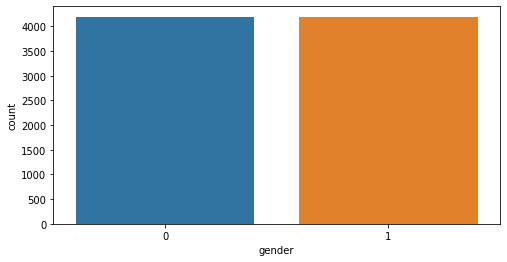

In [0]:
#to check if women and man are equivalent
plt.figure(figsize=(8,4))
sns.countplot(x = 'gender',data=df)

In [0]:
# Lets start understanding what people look for in a partner; men vs women
atributes_gender = df[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols

In [0]:
atributes_gender.head()

,Attractive,Sincere,Intelligente,Fun,Ambituous,Shared Interests
gender,,,,,,
0,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194
1,26.921689,16.498436,19.537374,17.763893,8.552829,10.996574


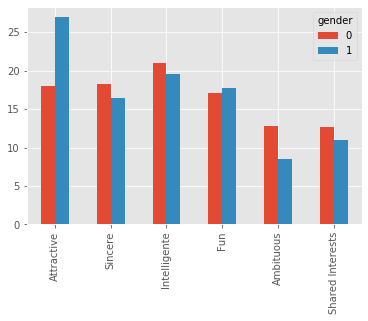

In [0]:
plt.style.use('ggplot')
atributes_gender.T.plot(kind='bar')

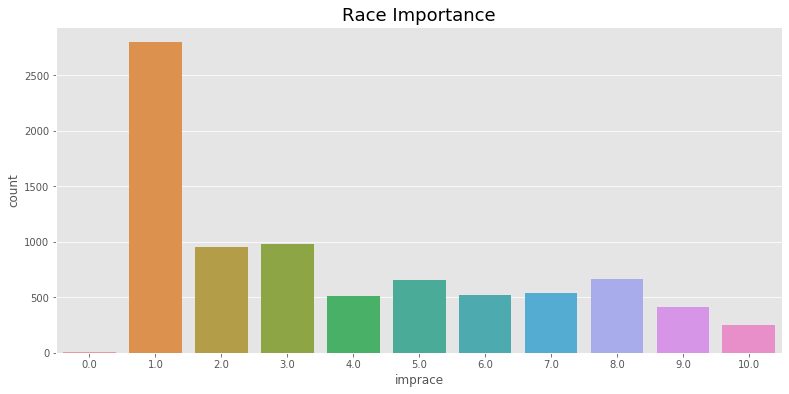

In [0]:
# Let's take a look 'imprace' (Importance to share the same racial/ethnic background?)
plt.figure(figsize=(13,6))
plt.title('Race Importance', fontsize=18)
sns.countplot(df['imprace'])

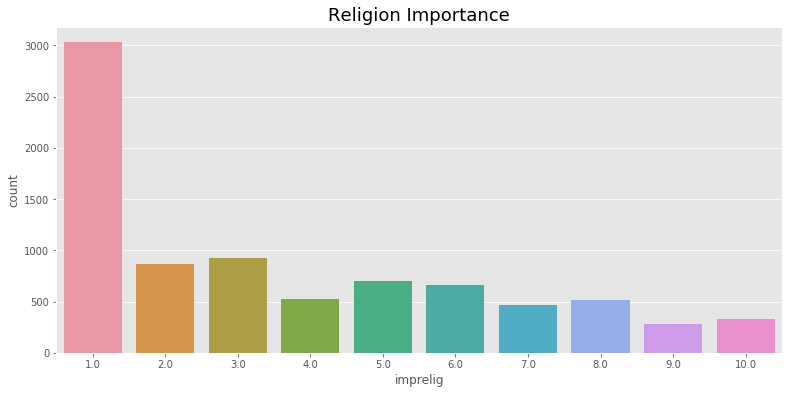

In [0]:
# Beeing the same racial/ethnic background doesn't mean much when choosing a date.
# Lets see if having the same religion is important
plt.figure(figsize=(13,6))
plt.title('Religion Importance', fontsize=18)
sns.countplot(df['imprelig'])

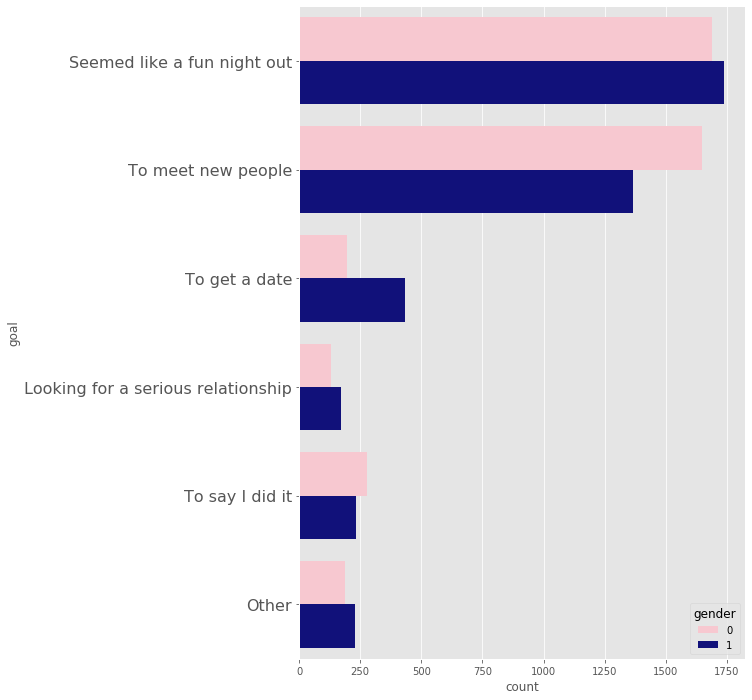

In [0]:
# Goal Men vs Women
goals = ['Seemed like a fun night out','To meet new people','To get a date'
        ,'Looking for a serious relationship','To say I did it','Other']
plt.figure(figsize=(8,12))
sn = sns.countplot(y='goal',data=df, hue='gender', palette=['pink','darkblue'])
sn.set(yticklabels=goals)
sn.set
sn = plt.yticks(rotation=0,fontsize=16)

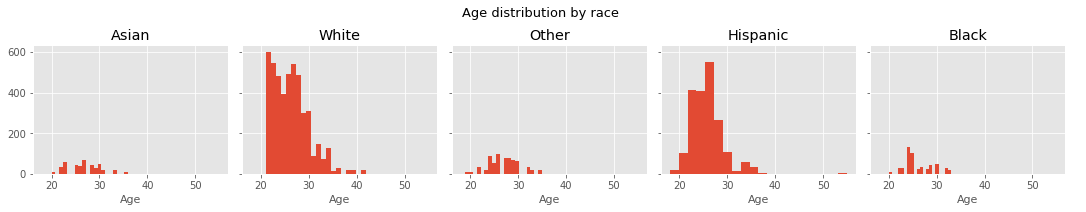

In [0]:
g = sns.FacetGrid(df, col='race', height=3)
g.map(plt.hist, 'age', bins=20)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('Age', fontsize=11)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

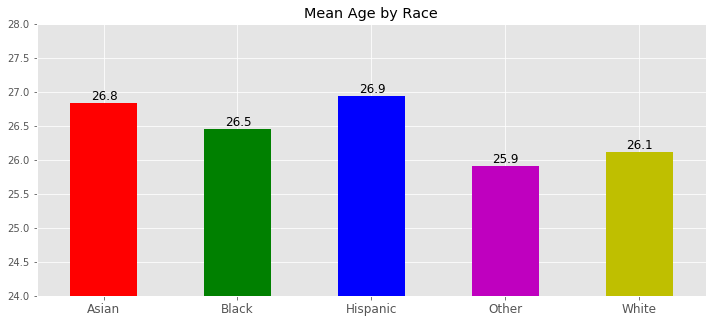

In [0]:
ax = df[['race', 'age']].groupby('race').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Mean Age by Race',
                                                   ylim=(24,28), color='rgbmy')
ax.set_xticklabels(['Asian', 'Black', 'Hispanic',  'Other', 'White'], 
                   fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.155, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

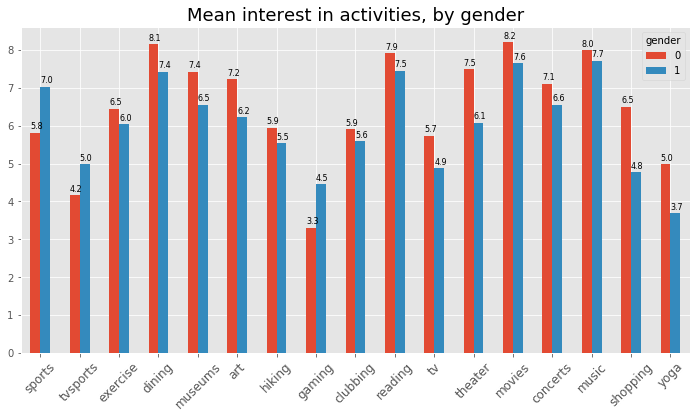

In [0]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']
tmp = df[['gender']+ interests].groupby(['gender']).mean().stack().unstack(0)
ax = tmp.plot(kind='bar', figsize=(12,6))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Mean interest in activities, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

- 


modeling - classification

i have tried different classification models to check if you like someone, odds are they will like you back!

In [0]:
#import libraries for algorithms
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

cleaning the data to feed into the model

In [0]:
# narrowing dataset
dating_1 = df.iloc[:, 11:28]
dating_2 = df.iloc[:, 30:35]
dating_3 = df.iloc[:, 39:43]
dating_4 = df.iloc[:, 45:67]
dating_5 = df.iloc[:, 69:74]
dating_6 = df.iloc[:, 87:91]
dating_7 = df.iloc[:, 97:102]
dating_8 = df.iloc[:, 104:107]

date = pd.concat([df.iloc[:, 0],df.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [0]:
date2 = date.dropna()
date3 = date2.drop(['field', 'from', 'career'], axis=1)
# removing interests
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)
date4.head()

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,like_o,prob_o,met_o,age,race,imprace,imprelig,goal,date,go_out,career_c,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
30,4,0,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,6.0,3.0,2.0,23.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,7.0,0,4.0,10.0,8.0,5.0,6.0,7.0,2.0
31,4,0,12.0,0,-0.18,1,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,6.0,5.0,10.0,6.0,6.0,3.0,1.0,23.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,7.0,0,8.0,7.0,8.0,10.0,8.0,1.0,1.0
33,4,0,14.0,1,-0.18,1,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,7.0,7.0,9.0,8.0,10.0,1.0,23.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,7.0,1,8.0,10.0,7.0,10.0,8.0,10.0,1.0
34,4,0,15.0,0,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,8.0,9.0,8.0,9.0,7.0,2.0,23.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,7.0,0,6.0,9.0,8.0,9.0,7.0,7.0,2.0
35,4,0,16.0,0,0.37,1,25.0,2.0,50.0,0.0,30.0,10.0,0.0,10.0,1,6.0,6.0,7.0,7.0,6.0,6.0,2.0,23.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,7.0,0,5.0,10.0,8.0,4.0,4.0,3.0,2.0


In [0]:
# preparing the data
X=date4[['like','dec']]
y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [0]:
# logistic regression classification model
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.8282140886518301
Validation Accuracy: 0.8279411764705882


In [0]:
# random forest model
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.8289497884862976
Validation Accuracy: 0.8272058823529411


In [0]:
# xgboost model
model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.8289497884862976
Validation Accuracy: 0.8272058823529411


**Conclusion:**

Although this was slightly disappointing,it looks like there still is no real answers. It's not interests or hobbies, it's not attractiveness or intelligence or other traits. Really it's just how much someone likes you. 

To summarize:

Dating is tougher for men (perhaps women can be more selective?)
Being likeable is important for securing that second date!